In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()
import os

In [5]:
os.chdir("/Users/shree/Desktop/MLP")

In [6]:
os.listdir()

['bank_cleaned.csv',
 '.gitattributes',
 'KNN_Loan Approval Prediction.ipynb',
 '.git',
 'train_u6lujuX_CVtuZ9i (1).csv']

In [7]:
A= pd.read_csv("bank_cleaned.csv")

In [8]:
A.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
0,0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0
1,1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0
3,5,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0
4,6,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0


In [9]:
A.tail()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
40836,45205,25,technician,single,secondary,no,505,no,yes,17,nov,6.43,2,-1,0,unknown,yes,1
40837,45206,51,technician,married,tertiary,no,825,no,no,17,nov,16.28,3,-1,0,unknown,yes,1
40838,45207,71,retired,divorced,primary,no,1729,no,no,17,nov,7.60,2,-1,0,unknown,yes,1
40839,45208,72,retired,married,secondary,no,5715,no,no,17,nov,18.78,5,184,3,success,yes,1
40840,45209,57,blue-collar,married,secondary,no,668,no,no,17,nov,8.47,4,-1,0,unknown,no,0


In [10]:
A.shape

(40841, 18)

In [11]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40841 entries, 0 to 40840
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       40841 non-null  int64  
 1   age              40841 non-null  int64  
 2   job              40841 non-null  object 
 3   marital          40841 non-null  object 
 4   education        40841 non-null  object 
 5   default          40841 non-null  object 
 6   balance          40841 non-null  int64  
 7   housing          40841 non-null  object 
 8   loan             40841 non-null  object 
 9   day              40841 non-null  int64  
 10  month            40841 non-null  object 
 11  duration         40841 non-null  float64
 12  campaign         40841 non-null  int64  
 13  pdays            40841 non-null  int64  
 14  previous         40841 non-null  int64  
 15  poutcome         40841 non-null  object 
 16  response         40841 non-null  object 
 17  response_bin

In [12]:
A.describe()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous,response_binary
count,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000
mean,22006.477657,40.790676,1073.981807,15.863666,4.308949,2.774149,32.248304,0.436791,0.113587
std,12919.797651,10.475473,1712.556186,8.313608,4.305823,3.104177,90.738402,1.572342,0.317313
min,0.000000,18.000000,-6847.000000,1.000000,0.100000,1.000000,-1.000000,0.000000,0.000000
25%,10888.000000,33.000000,64.000000,8.000000,1.730000,1.000000,-1.000000,0.000000,0.000000
50%,21652.000000,39.000000,421.000000,16.000000,3.000000,2.000000,-1.000000,0.000000,0.000000
75%,33102.000000,48.000000,1333.000000,21.000000,5.300000,3.000000,-1.000000,0.000000,0.000000
max,45209.000000,95.000000,10443.000000,31.000000,81.970000,58.000000,871.000000,55.000000,1.000000


In [13]:
A.drop(['Unnamed: 0','response'], axis=1, inplace=True)

In [14]:
A.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response_binary
0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,0
3,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,0
4,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,0


In [15]:
A.dropna()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response_binary
0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,0
3,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,0
4,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40836,25,technician,single,secondary,no,505,no,yes,17,nov,6.43,2,-1,0,unknown,1
40837,51,technician,married,tertiary,no,825,no,no,17,nov,16.28,3,-1,0,unknown,1
40838,71,retired,divorced,primary,no,1729,no,no,17,nov,7.60,2,-1,0,unknown,1
40839,72,retired,married,secondary,no,5715,no,no,17,nov,18.78,5,184,3,success,1


In [16]:
A.shape

(40841, 16)

In [17]:
duplicate_rows_A = A[A.duplicated()]
print('Number of duplicate rows:', duplicate_rows_A.shape)

Number of duplicate rows: (0, 16)


In [18]:
num_atr=['age' , 'balance' , 'day' , 'duration' , 'campaign' , 'pdays' , 'previous']

cat_atr=['job' , 'marital' , 'education' , 'default' , 'housing' , 'loan' , 'poutcome' , 'month']

In [19]:
A.corr()

,age,balance,day,duration,campaign,pdays,previous,response_binary
age,1.000000,0.103405,-0.010549,-0.007422,0.003563,-0.005815,0.012862,0.023204
balance,0.103405,1.000000,0.008062,0.035481,-0.026482,0.017674,0.036765,0.069456
day,-0.010549,0.008062,1.000000,-0.032656,0.172387,-0.089812,-0.056279,-0.035323
duration,-0.007422,0.035481,-0.032656,1.000000,-0.081852,-0.000242,0.004824,0.400681
campaign,0.003563,-0.026482,0.172387,-0.081852,1.000000,-0.094891,-0.051522,-0.072495
pdays,-0.005815,0.017674,-0.089812,-0.000242,-0.094891,1.000000,0.567728,0.108554
previous,0.012862,0.036765,-0.056279,0.004824,-0.051522,0.567728,1.000000,0.128274
response_binary,0.023204,0.069456,-0.035323,0.400681,-0.072495,0.108554,0.128274,1.000000


In [20]:
A.job.value_counts()

blue-collar      8805
management       8565
technician       6954
admin.           4705
services         3801
retired          2020
self-employed    1443
entrepreneur     1340
unemployed       1212
housemaid        1149
student           689
other             158
Name: job, dtype: int64

In [21]:
A.marital.value_counts()

married     24641
single      11443
divorced     4757
Name: marital, dtype: int64

In [22]:
A.default.value_counts()

no     40078
yes      763
Name: default, dtype: int64

In [23]:
A.education.value_counts()

secondary    21933
tertiary     12380
primary       6528
Name: education, dtype: int64

In [24]:
A.housing.value_counts()

yes    22820
no     18021
Name: housing, dtype: int64

In [25]:
A.loan.value_counts()

no     34042
yes     6799
Name: loan, dtype: int64

In [26]:
A.poutcome.value_counts()

unknown    34802
failure     4648
success     1391
Name: poutcome, dtype: int64

In [27]:
A.response_binary.value_counts()

0    36202
1     4639
Name: response_binary, dtype: int64

In [28]:
A.month.value_counts()

may    12496
jul     6520
aug     5877
jun     4853
nov     3483
apr     2529
feb     2258
jan     1183
oct      605
sep      457
mar      407
dec      173
Name: month, dtype: int64

In [29]:
A.response_binary.value_counts()

0    36202
1     4639
Name: response_binary, dtype: int64

In [30]:
A.dtypes

age                  int64
job                 object
marital             object
education           object
default             object
balance              int64
housing             object
loan                object
day                  int64
month               object
duration           float64
campaign             int64
pdays                int64
previous             int64
poutcome            object
response_binary      int64
dtype: object

In [31]:
A.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'response_binary'],
      dtype='object')

In [32]:
A.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response_binary
0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,0
3,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,0
4,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,0


In [33]:
pd.crosstab(A['job'] , A['response_binary'])

response_binary,0,1
job,,
admin.,4142,563
blue-collar,8168,637
entrepreneur,1231,109
housemaid,1048,101
management,7440,1125
other,143,15
retired,1572,448
self-employed,1281,162
services,3469,332


In [34]:
pd.crosstab(A['education'] , A['response_binary'])

response_binary,0,1
education,,
primary,5981,547
secondary,19654,2279
tertiary,10567,1813


In [35]:
pd.crosstab(A['housing'] , A['response_binary'])

response_binary,0,1
housing,,
no,15119,2902
yes,21083,1737


In [36]:
pd.crosstab(A['default'] , A['response_binary'])

response_binary,0,1
default,,
no,35485,4593
yes,717,46


In [37]:
pd.crosstab(A['marital'] , A['response_binary'])

response_binary,0,1
marital,,
divorced,4205,552
married,22228,2413
single,9769,1674


In [38]:
pd.crosstab(A['poutcome'] , A['response_binary'])

response_binary,0,1
poutcome,,
failure,4069,579
success,495,896
unknown,31638,3164


In [39]:
pd.crosstab(A['month'] , A['response_binary'])

response_binary,0,1
month,,
apr,2033,496
aug,5263,614
dec,94,79
feb,1868,390
jan,1061,122
jul,5968,552
jun,4363,490
mar,186,221
may,11670,826


In [40]:
A.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response_binary
0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,0
3,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,0
4,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,0


In [41]:
A[['balance','response_binary']].sort_values('balance', ascending = False)

,balance,response_binary
24037,10443,0
9062,10442,0
13721,10438,0
6077,10436,0
3266,10399,0
...,...,...
30290,-3058,1
1766,-3313,0
6981,-3372,0
35504,-4057,0


In [42]:
A.duration.mean()

4.308949340123857

In [43]:
A.balance.mean()

1073.9818074973678

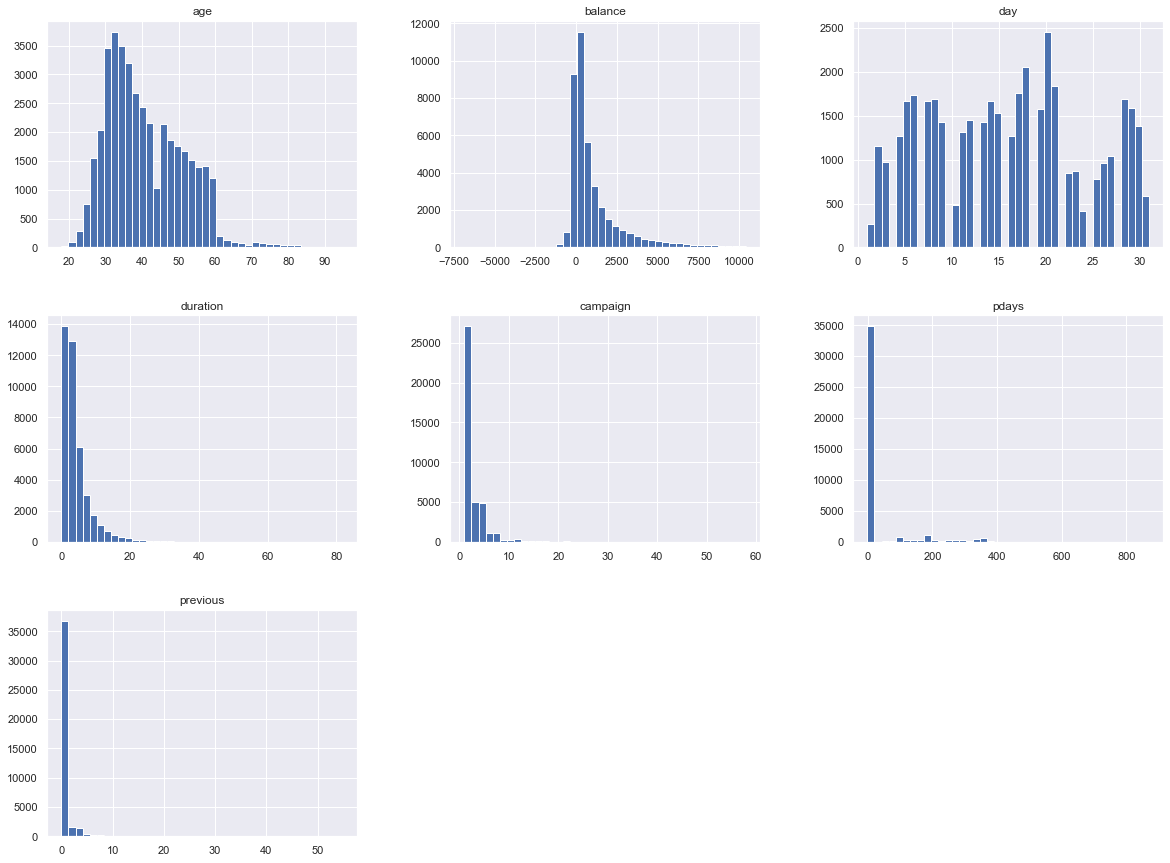

In [44]:
A[num_atr].hist(bins=40, figsize=(20,15)) 
plt.show()

In [45]:
A.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response_binary
0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,0
3,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,0
4,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,0


<AxesSubplot:xlabel='job', ylabel='count'>

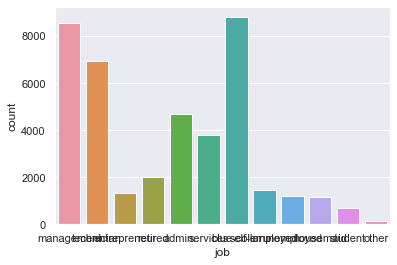

In [46]:
sns.countplot(x = 'job', data = A)

<AxesSubplot:xlabel='education', ylabel='count'>

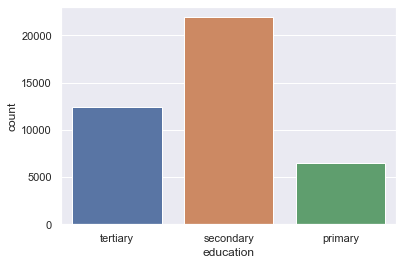

In [47]:
sns.countplot(x = 'education', data = A)

<AxesSubplot:xlabel='marital', ylabel='count'>

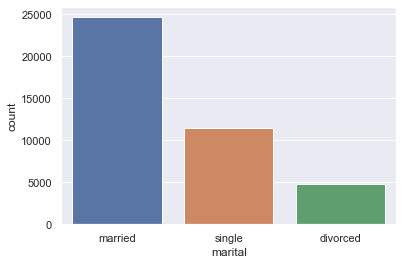

In [48]:
sns.countplot(x = 'marital', data = A)

<AxesSubplot:xlabel='housing', ylabel='count'>

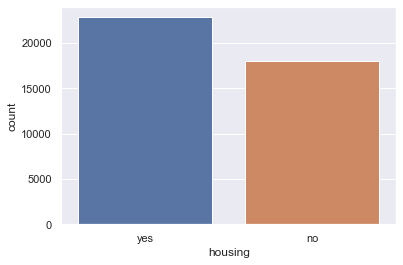

In [49]:
sns.countplot(x = 'housing', data = A)

<AxesSubplot:xlabel='default', ylabel='count'>

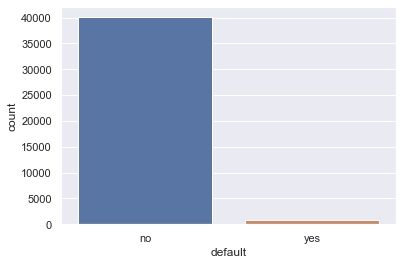

In [50]:
sns.countplot(x = 'default', data = A)

<AxesSubplot:xlabel='loan', ylabel='count'>

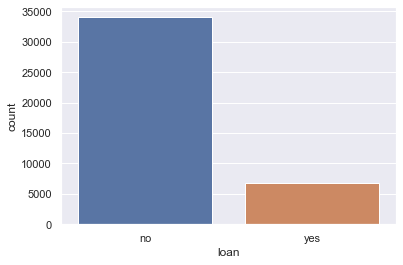

In [51]:
sns.countplot(x = 'loan', data = A)

<AxesSubplot:xlabel='housing', ylabel='count'>

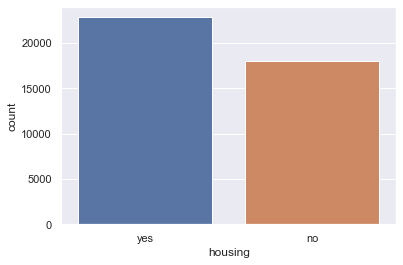

In [52]:
sns.countplot(x = 'housing', data = A)

<AxesSubplot:xlabel='poutcome', ylabel='count'>

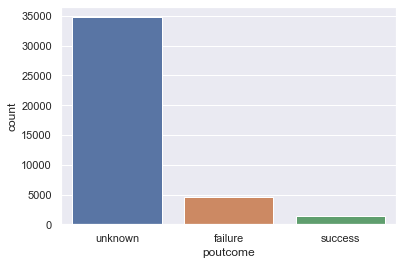

In [53]:
sns.countplot(x = 'poutcome', data = A)

<AxesSubplot:xlabel='month', ylabel='count'>

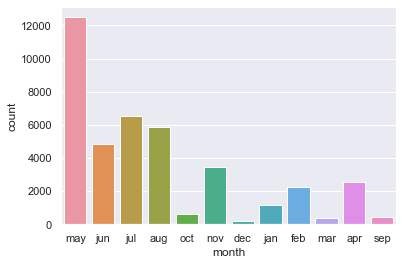

In [54]:
sns.countplot(x = 'month', data = A)

In [55]:
A.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response_binary
0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,0
3,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,0
4,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,0


<AxesSubplot:xlabel='job', ylabel='response_binary'>

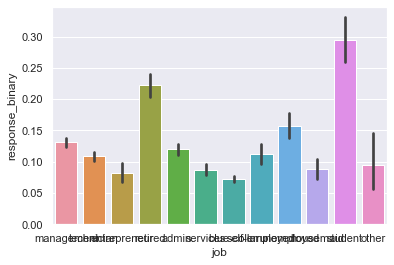

In [56]:
sns.barplot(x = 'job', y = 'response_binary', data = A)

<AxesSubplot:xlabel='education', ylabel='response_binary'>

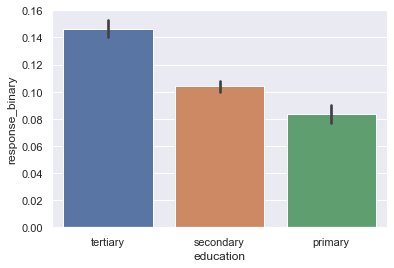

In [57]:
sns.barplot(x = 'education', y = 'response_binary', data = A)

<AxesSubplot:xlabel='housing', ylabel='response_binary'>

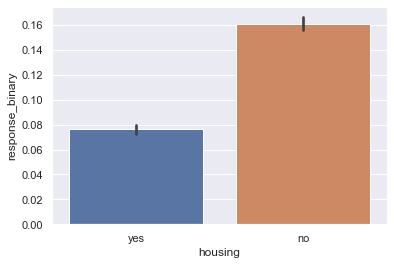

In [58]:
sns.barplot(x = 'housing', y = 'response_binary', data = A)

<AxesSubplot:xlabel='poutcome', ylabel='response_binary'>

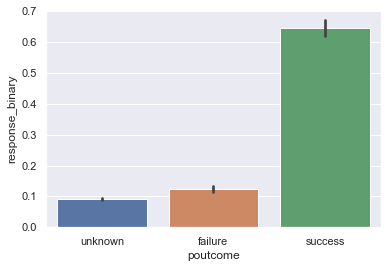

In [59]:
sns.barplot(x = 'poutcome', y = 'response_binary', data = A)

<AxesSubplot:xlabel='month', ylabel='response_binary'>

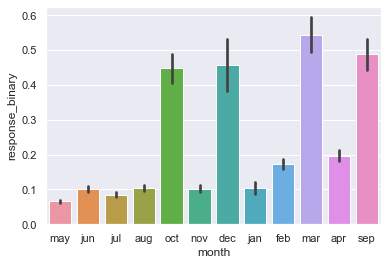

In [60]:
sns.barplot(x = 'month', y = 'response_binary', data = A)

<AxesSubplot:xlabel='response_binary', ylabel='age'>

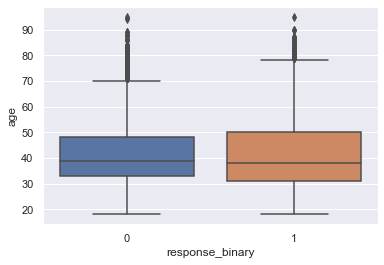

In [61]:
sns.boxplot(x = 'response_binary', y = 'age', data = A)

In [62]:
A.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response_binary
0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,0
3,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,0
4,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,0


<AxesSubplot:xlabel='response_binary', ylabel='balance'>

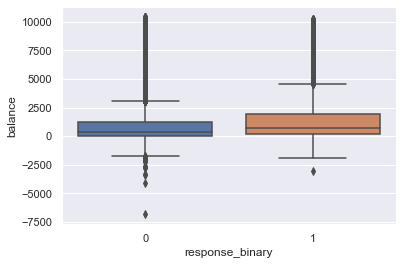

In [63]:
sns.boxplot(x = 'response_binary', y = 'balance', data = A)

<AxesSubplot:xlabel='response_binary', ylabel='duration'>

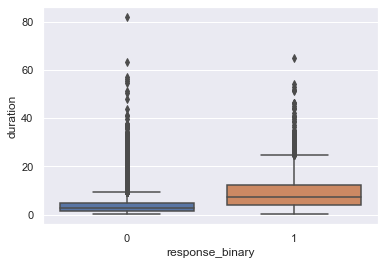

In [64]:
sns.boxplot(x = 'response_binary', y = 'duration', data = A)

In [65]:
A_corr = A.corr()
A_corr

,age,balance,day,duration,campaign,pdays,previous,response_binary
age,1.000000,0.103405,-0.010549,-0.007422,0.003563,-0.005815,0.012862,0.023204
balance,0.103405,1.000000,0.008062,0.035481,-0.026482,0.017674,0.036765,0.069456
day,-0.010549,0.008062,1.000000,-0.032656,0.172387,-0.089812,-0.056279,-0.035323
duration,-0.007422,0.035481,-0.032656,1.000000,-0.081852,-0.000242,0.004824,0.400681
campaign,0.003563,-0.026482,0.172387,-0.081852,1.000000,-0.094891,-0.051522,-0.072495
pdays,-0.005815,0.017674,-0.089812,-0.000242,-0.094891,1.000000,0.567728,0.108554
previous,0.012862,0.036765,-0.056279,0.004824,-0.051522,0.567728,1.000000,0.128274
response_binary,0.023204,0.069456,-0.035323,0.400681,-0.072495,0.108554,0.128274,1.000000


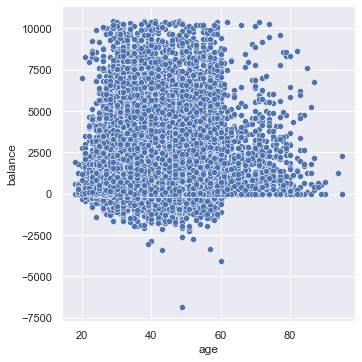

In [66]:
sns.relplot(x='age',y='balance',kind='scatter',cmap='winter',data=A)

<AxesSubplot:>

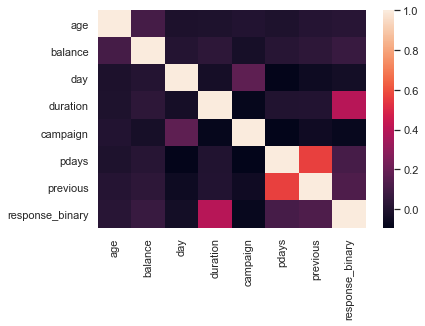

In [70]:
sns.heatmap(A_corr)

# KNN Classification Algorithm

In [71]:
from sklearn.model_selection import train_test_split
X= A.drop(['response_binary'], axis=1)
y= A['response_binary']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score 
from sklearn.preprocessing import OneHotEncoder as onehot
from sklearn.preprocessing import LabelEncoder

In [73]:
le = LabelEncoder()
X_train[cat_atr] = X_train[cat_atr].apply(le.fit_transform)

/Users/shree/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [74]:
X_train[cat_atr].head()

,job,marital,education,default,housing,loan,poutcome,month
8006,1,1,0,0,1,0,2,6
6900,1,1,1,0,1,1,2,8
19270,3,1,1,0,0,0,2,1
5185,8,1,1,0,0,0,2,8
4791,4,1,2,0,1,0,2,8


In [75]:
ss = StandardScaler()
ss.fit_transform(X_train[num_atr])

array([[-1.03279024, -0.42201272, -1.54203421, ..., -0.57184736,
        -0.36824873, -0.27816025],
       [-0.07972134, -0.62526263,  1.59065425, ...,  0.06650842,
        -0.36824873, -0.27816025],
       [-0.07972134, -0.00846378, -0.45764205, ..., -0.25266947,
        -0.36824873, -0.27816025],
       ...,
       [-0.27033512, -0.31627578,  0.86772615, ..., -0.25266947,
        -0.36824873, -0.27816025],
       [ 0.87334756, -0.62232549, -1.06008214, ..., -0.57184736,
        -0.36824873, -0.27816025],
       [ 1.06396134, -0.60998952, -0.93959412, ..., -0.25266947,
         3.66926515,  0.35567087]])

In [76]:
a = X_train[cat_atr]
b = ss.transform(X_train[num_atr])

Xtr = np.hstack([a,b])
Xtr.shape

(28588, 15)

In [77]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(Xtr, y_train)

KNeighborsClassifier(metric='euclidean')

In [78]:
ss = StandardScaler()
ss.fit_transform(X_test[num_atr])
le = LabelEncoder()
X_test[cat_atr] = X_test[cat_atr].apply(le.fit_transform)
a1 = X_test[cat_atr]
b1 = ss.transform(X_test[num_atr])

Xtr1 = np.hstack([a1,b1]) 
Xtr1.shape 

/Users/shree/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


(12253, 15)

In [79]:
y_pred = knn.predict(Xtr1)

confusion_matrix(y_test, y_pred)

array([[10553,   272],
       [ 1009,   419]])

In [80]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8954541744878806

In [81]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_test, y_pred)

(array([0.91273136, 0.60636758]),
 array([0.97487298, 0.29341737]),
 array([0.94277929, 0.39546956]),
 array([10825,  1428]))

In [82]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

0.6063675832127352

In [83]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

0.2934173669467787

In [84]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.39546956111373294

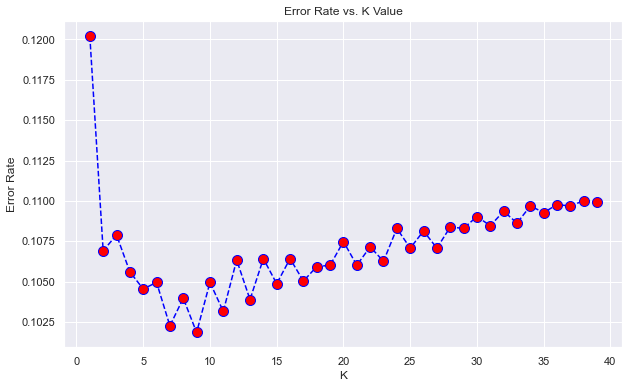

Minimum error:- 0.10185260752468783 at K = 9


In [85]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(Xtr,y_train)
 pred_i = knn.predict(Xtr1)
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [86]:
knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
knn.fit(Xtr, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [87]:
y_pred = knn.predict(Xtr1)

accuracy_score(y_test, y_pred)

0.8981473924753122